In [3]:
import  pandas as pd
import numpy as np
import sklearn

import matplotlib as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import *

Load the Data, alternative data path 192.168.1.56

In [4]:
files = ["../dataGenerator/result/PRex_DataSet_Full_2239.csv",
         "../dataGenerator/result/PRex_DataSet_Full_2240.csv",
         "../dataGenerator/result/PRex_DataSet_Full_2241.csv",
         "../dataGenerator/result/PRex_DataSet_Full_2244.csv",
         "../dataGenerator/result/PRex_DataSet_Full_2245.csv",
         "../dataGenerator/result/PRex_DataSet_Full_2256.csv",
         "../dataGenerator/result/PRex_DataSet_Full_2257.csv"
         ]

li = []

for filename in files:
    print("Loading file {}".format(filename))
    df = pd.read_csv(filename)
    li.append(df)

data = pd.concat(li)
data.sample(frac=1)
data.shape

Loading file ../dataGenerator/result/PRex_DataSet_Full_2239.csv
Loading file ../dataGenerator/result/PRex_DataSet_Full_2240.csv
Loading file ../dataGenerator/result/PRex_DataSet_Full_2241.csv
Loading file ../dataGenerator/result/PRex_DataSet_Full_2244.csv
Loading file ../dataGenerator/result/PRex_DataSet_Full_2245.csv
Loading file ../dataGenerator/result/PRex_DataSet_Full_2256.csv
Loading file ../dataGenerator/result/PRex_DataSet_Full_2257.csv


(221493, 631)

In [5]:
data.head()


,evtID,CutID,bpmX,bpmY,x0th0y0ph0,x0th0y0ph1,x0th0y0ph2,x0th0y0ph3,x0th0y0ph4,x0th0y1ph0,...,x4th4y3ph2,x4th4y3ph3,x4th4y3ph4,x4th4y4ph0,x4th4y4ph1,x4th4y4ph2,x4th4y4ph3,x4th4y4ph4,targCalTh,targCalPh
0,0,136,0.003794,-0.000501,1,-0.001618,0.000003,-4.234070e-09,6.849800e-12,0.011066,...,1.465170e-32,-2.370320e-35,3.834650e-38,6.195190e-29,-1.002250e-31,1.621410e-34,-2.623090e-37,4.243580e-40,-0.000817,-0.010117
1,1,130,0.003794,-0.000501,1,-0.009000,0.000081,-7.289810e-07,6.560770e-09,0.008514,...,5.729530e-26,-5.156530e-28,4.640840e-30,6.022230e-24,-5.419960e-26,4.877920e-28,-4.390090e-30,3.951040e-32,0.019571,-0.012569
2,2,179,0.003794,-0.000501,1,0.014969,0.000224,3.354050e-06,5.020650e-08,-0.014659,...,-4.567400e-26,-6.836890e-28,-1.023410e-29,2.988110e-24,4.472870e-26,6.695400e-28,1.002230e-29,1.500220e-31,0.012775,0.014835
3,3,142,0.003794,-0.000501,1,0.001385,0.000002,2.657600e-09,3.681180e-12,0.003021,...,6.895500e-31,9.551300e-34,1.323000e-36,1.085790e-27,1.503990e-30,2.083250e-33,2.885610e-36,3.997000e-39,-0.014409,-0.003863
4,4,127,0.003794,-0.000501,1,-0.004135,0.000017,-7.070060e-08,2.923460e-10,0.012108,...,1.183870e-30,-4.895280e-33,2.024190e-35,8.383250e-28,-3.466470e-30,1.433380e-32,-5.927010e-35,2.450810e-37,-0.021206,-0.012569


Select Numerical Columms

In [6]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(221493, 631)

Seperate the data into training and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['evtID', 'CutID','bpmX','bpmY','targCalTh','targCalPh'], axis=1),
    data['targCalTh'],
    test_size=0.2,
    random_state=0)
X_train.shape,X_test.shape

((177194, 625), (44299, 625))

In [8]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))


StandardScaler()

In [9]:
clf = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
clf.score(X_train,y_train)

0.9664236746711129

In [10]:
clf.predict(X_test)

array([ 0.00852286, -0.02878026, -0.00970056, ..., -0.01641879,
        0.02384588,  0.01686926])

In [11]:
y_test


699      0.012772
10825   -0.026090
19106   -0.014400
30658   -0.005704
25714   -0.021192
           ...   
23888   -0.021192
14767    0.001086
25163   -0.014400
18490    0.026345
2342     0.019564
Name: targCalTh, Length: 44299, dtype: float64

In [12]:
clf = RidgeCV(alphas=[x/100. for x in range(1,100)]).fit(X_train, y_train)
clf.score(X_train,y_train)

0.9682784273018035

In [13]:
clf.predict(X_test)

array([ 0.0082247 , -0.0288321 , -0.00986765, ..., -0.01632653,
        0.02419889,  0.01656655])

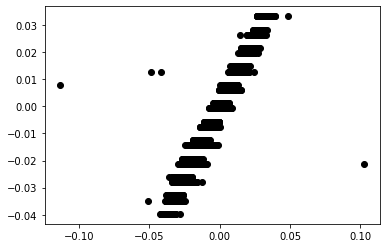

In [14]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
pred = reg.predict(X_test)

plt.pyplot.scatter(pred, y_test,  color='black')
plt.pyplot.show()